In [58]:
import nltk
from nltk import bigrams
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [59]:
import collections
from collections import Counter
from nltk.corpus.reader.plaintext import PlaintextCorpusReader

In [60]:
corpusdir= r'C:\Users\LENOVO\Desktop\Cognitive ML examples\phy_corpus'  # point to the Directory of corpus. #r is used to convert it to raw string

In [61]:
your_corpus = PlaintextCorpusReader(corpusdir, '.*')


In [76]:
#compute the bigram model
def build_bigram_model():
    bigram_model = collections.defaultdict(lambda: collections.defaultdict(lambda: 0))
    for sentence in your_corpus.sents([r'C:\Users\LENOVO\Desktop\Cognitive ML examples\phy_corpus']):
        sentence = [word.lower() for word in sentence if word.isalpha()]  # get alpha only
        #Collect all bigrams counts for (w1,w2)
        for w1, w2 in bigrams(sentence):
            bigram_model[w1][w2] += 1
        #compute the probability for the bigram starting with w1
        for w1 in bigram_model:
            #total count of bigrams starting with w1
            bigram_count_4_w1 = float(sum(bigram_model[w1].values()))
            #distribute the probability mass for all bigrams starting with w1
            for w2 in bigram_model[w1]:
                bigram_model[w1][w2] /= bigram_count_4_w1
    return bigram_model
    

In [77]:
def predict_next_word(first_word):
    #build the model
    model = build_bigram_model()
    #get the next for the bigram starting with 'word'
    second_word = model[first_word]
    #get the top 10 words whose first word is 'first_word'
    top10words = Counter(second_word).most_common(10)
    
    predicted_words = list(zip(*top10words))[0]
    probability_score = list(zip(*top10words))[1]
    x_pos = np.arange(len(predicted_words))

    # calculate slope and intercept for the linear trend line
    slope, intercept = np.polyfit(x_pos, probability_score, 1)

    plt.bar(x_pos, probability_score,align='center')
    plt.xticks(x_pos, predicted_words)
    plt.ylabel('Probability Score')
    plt.xlabel('Predicted Words')
    plt.title('Predicted words for ' + first_word)
    plt.show()



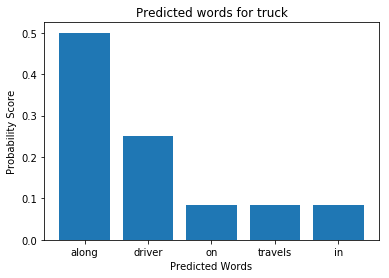

In [111]:
predict_next_word('truck')

In [105]:
datetime(1970,1,1).strftime('%Y-%d-%B')

'1970-01-January'

In [104]:
from datetime import date
from datetime import time
from datetime import datetime